# Sigmoid Neuron

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Plotting Sigmoid function

$$
S_{w,b}(x)=\frac{1}{1+e^{-(wx + b)}}
$$

In [34]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(np.dot(w,x) + b)))

In [35]:
sigmoid(1, 0.5, 0)

0.6224593312018546

## Plotting Sigmoid function in 2D

In [36]:
w = -0.5
b = 0.1
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

In [37]:
type(Y)

numpy.ndarray

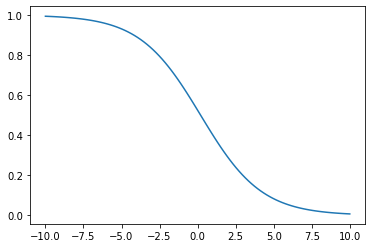

In [38]:
plt.plot(X, Y)
plt.show()

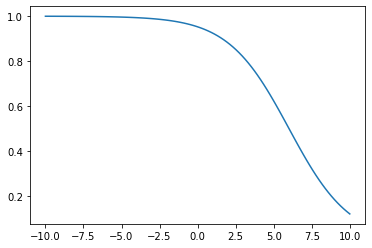

In [39]:
w = -0.5
b = 3
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

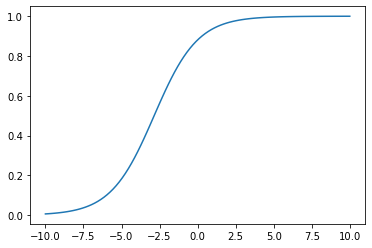

In [40]:
w = 0.7
b = 2
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

## Plotting Sigmoid function as 3D Plot

$$
S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(w_1x_1 + w_2x_2 + b)}}
$$

In [41]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(np.dot(w1,x1) + np.dot(w2, x2) + b)))

In [42]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [43]:
from mpl_toolkits import mplot3d

In [44]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape)
print(XX1.shape)


(100,)
(100, 100)


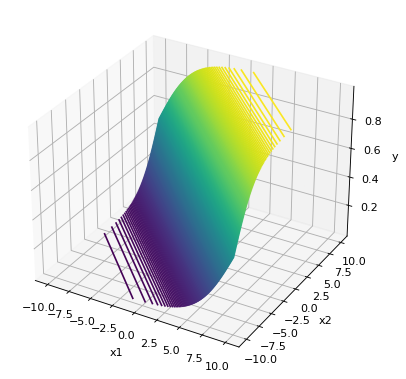

In [50]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 300)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

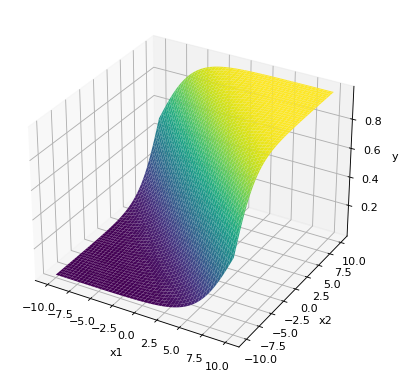

In [51]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

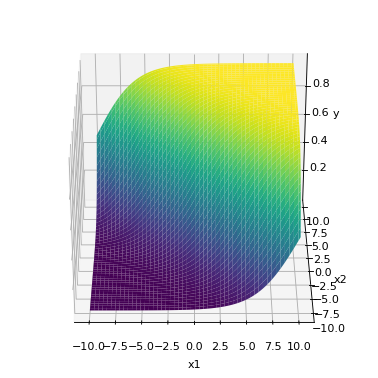

In [55]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

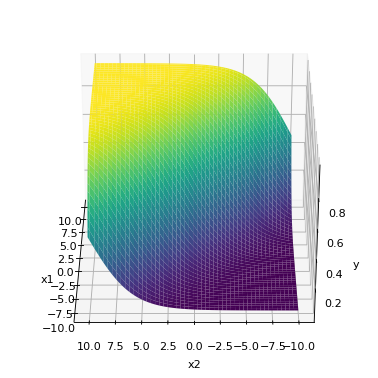

In [57]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)

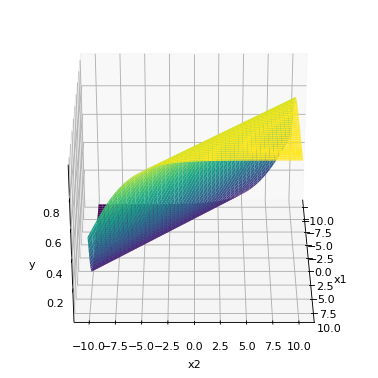

In [58]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 0)

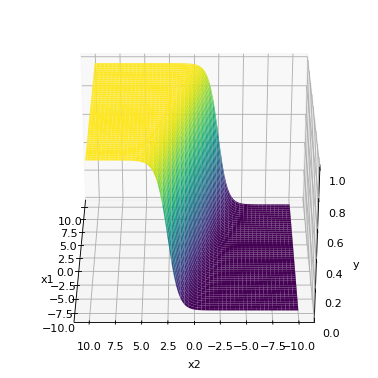

In [61]:
w1 = 0.5
w2 = 2 # here X2 is dominating contributor to Y
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)

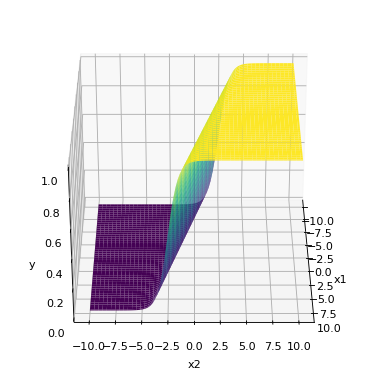

In [62]:
w1 = 0.5
w2 = 2 # here X2 is dominating contributor to Y
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 0)

Text(0.5, 0, 'y')

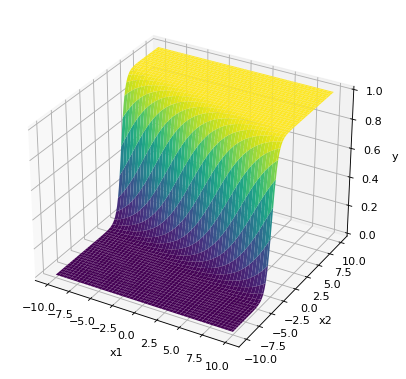

In [63]:
w1 = 0.5
w2 = 2 # here X2 is dominating contributor to Y
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


## Compute Loss

In [64]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

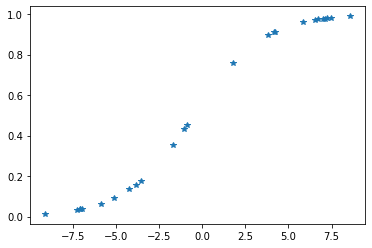

In [66]:
plt.plot(X, Y, '*')
plt.show()

In [70]:
def calculate_loss(X, Y, estimates_w, estimate_b):
    loss = 0 
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, estimates_w, estimate_b)) ** 2
    
    return loss

In [76]:
w = np.linspace(0, 2, 100)
b = np.linspace(-1, 1, 100)

W, B = np.meshgrid(w, b)
loss = calculate_loss(X, Y, W, B) # broadcasting of w & b

In [77]:
loss.shape

(100, 100)

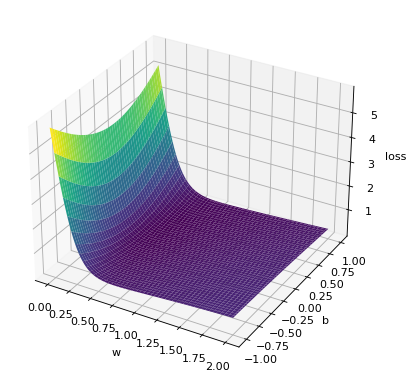

In [78]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
plt.show()

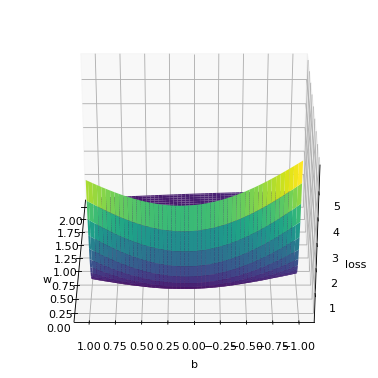

In [79]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30, 180)

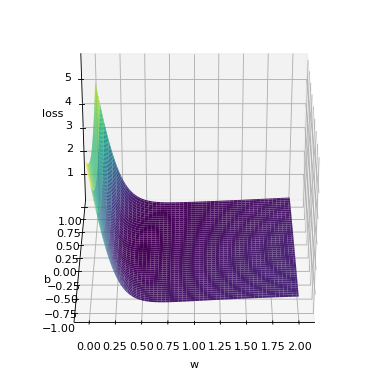

In [80]:

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30, 270)

In [84]:
# after flatting all rows & column
ij = np.argmin(loss)
print(ij)

6225


In [85]:
i = np.floor(ij / loss.shape[1])
j = ij - i * loss.shape[1]

In [89]:
print(i, j)

62.0 25.0


In [90]:
i = int(i)
j = int(j)

In [91]:
loss[i, j]

5.046194151376707e-05

In [92]:
W[i, j]

0.5050505050505051

In [93]:
B[i, j]

0.2525252525252526